# GRU

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/without_normalize_nasdaq_and_sentiment_analysis.csv'

In [4]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())  # 데이터의 처음 5행을 출력

          day         Open          High          Low         Close  \
0  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
1  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
2  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
3  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
4  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   

       Volume     Adj Close  vader_sentiment  roberta_sentiment  \
0  6120600000  15074.570312               -1                 -1   
1  6120600000  15074.570312                0                  1   
2  6120600000  15074.570312                1                  1   
3  6120600000  15074.570312                1                 -1   
4  6120600000  15074.570312                0                 -1   

   total_sentiment  
0             -1.0  
1              0.5  
2              1.0  
3              0.0  
4             -0.5  


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [6]:
# 데이터 정규화
features_to_scale = ['Open', 'High', 'Low', 'Volume', 'Close'] # nasdaq 지수만 정규화

scaler = MinMaxScaler(feature_range=(-1,1))
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head(10))

          day      Open      High       Low     Close    Volume     Adj Close  \
0  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
1  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
2  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
3  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
4  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
5  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
6  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
7  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
8  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
9  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   

   vader_sentiment  roberta_sentiment  total_sentiment  
0               -1                 -1             -

In [7]:
df.drop(columns=['Adj Close'], inplace=True)

In [8]:
df

,day,Open,High,Low,Close,Volume,vader_sentiment,roberta_sentiment,total_sentiment
0,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,-1,-1,-1.0
1,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,0,1,0.5
2,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,1,1,1.0
3,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,1,-1,0.0
4,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,0,-1,-0.5
...,...,...,...,...,...,...,...,...,...
5578,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,0,0,0.0
5579,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,-1,-1,-1.0
5580,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,1,1,1.0
5581,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,1,1,1.0


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# 시계열 데이터 생성 함수
# df의 day 열 고려
def create_sequences(data, labels, days, sequence_length):
    X, y, day_seq = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(labels[i + sequence_length])
        day_seq.append(days[i+sequence_length]) # 해당 시퀀스의 마지막 날 추가
    return np.array(X), np.array(y), np.array(day_seq)

In [ ]:
# 시퀀스 길이 설정
sequence_length = 30
X, y = create_sequences(features_scaled, labels_scaled, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

nasdaq 지수만 활용하여 예측

In [10]:
nasdaq = ['Open', 'High', 'Low', 'Volume']

In [11]:
# 시퀀스 길이 설정
sequence_length = 30 # 과거 30일 데이터 사용하여 다음 날의 값 예측
# hyper-parameter!!!!!
X, y, day_seq = create_sequences(df[nasdaq].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 4)
X_test shape: (1111, 30, 4)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [12]:
# GRU 모델 정의
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [16]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - mae: 0.0446 - val_loss: 0.0017 - val_mae: 0.0287
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mae: 0.0399 - val_loss: 0.0025 - val_mae: 0.0365
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mae: 0.0382 - val_loss: 0.0019 - val_mae: 0.0306
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.0032 - val_mae: 0.0418
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mae: 0.0363 - val_loss: 0.0030 - val_mae: 0.0411
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0019 - val_mae: 0.0327
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0038 - val_mae: 0.0470
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0022 - mae: 0.0344 - val_loss: 0.0023 - val_mae: 0.0367
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - l

In [28]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")
# test_mae <0.1 이므로 모델 성능 좋음!

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0328
Test Loss: 0.003, Test MAE: 0.044


In [18]:
# 예측 수행
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


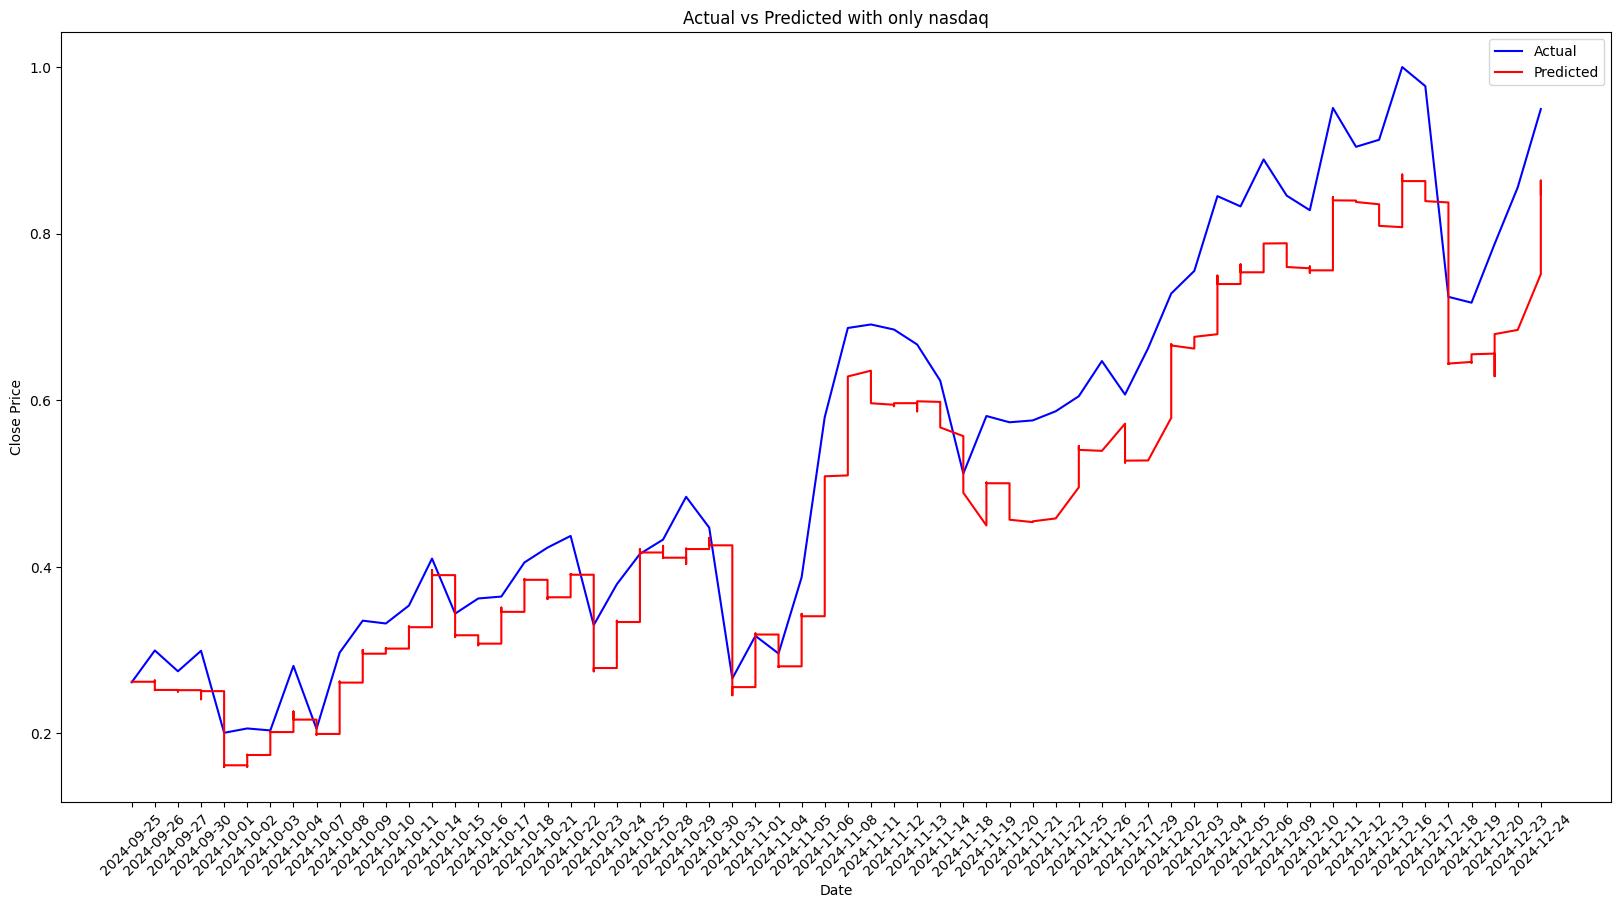

In [38]:
import matplotlib.pyplot as plt

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with only nasdaq')
plt.legend()
plt.show()

vader_sentiment도 고려

In [57]:
vader = ['Open', 'High', 'Low', 'Volume', 'vader_sentiment']

In [41]:
X, y, day_seq = create_sequences(df[vader].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [42]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0226 - mae: 0.1010 - val_loss: 0.0143 - val_mae: 0.1109
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mae: 0.0713 - val_loss: 0.0083 - val_mae: 0.0576
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mae: 0.0439 - val_loss: 0.0182 - val_mae: 0.0781
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mae: 0.0582 - val_loss: 0.0055 - val_mae: 0.0516
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mae: 0.0457 - val_loss: 0.0072 - val_mae: 0.0590
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mae: 0.0409 - val_loss: 0.0058 - val_mae: 0.0530
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mae: 0.0389 - val_loss: 0.0060 - val_mae: 0.0520
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mae: 0.0496 - val_loss: 0.0139 - val_mae: 0.0965
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - l

In [43]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")
# test_mae <= 0.1 이므로 모델 성능 좋다고 볼 수 있으나, nasdaq 지수만 활용했을 때 0.044보다는 성능 낮음!

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0680
Test Loss: 0.014, Test MAE: 0.100


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


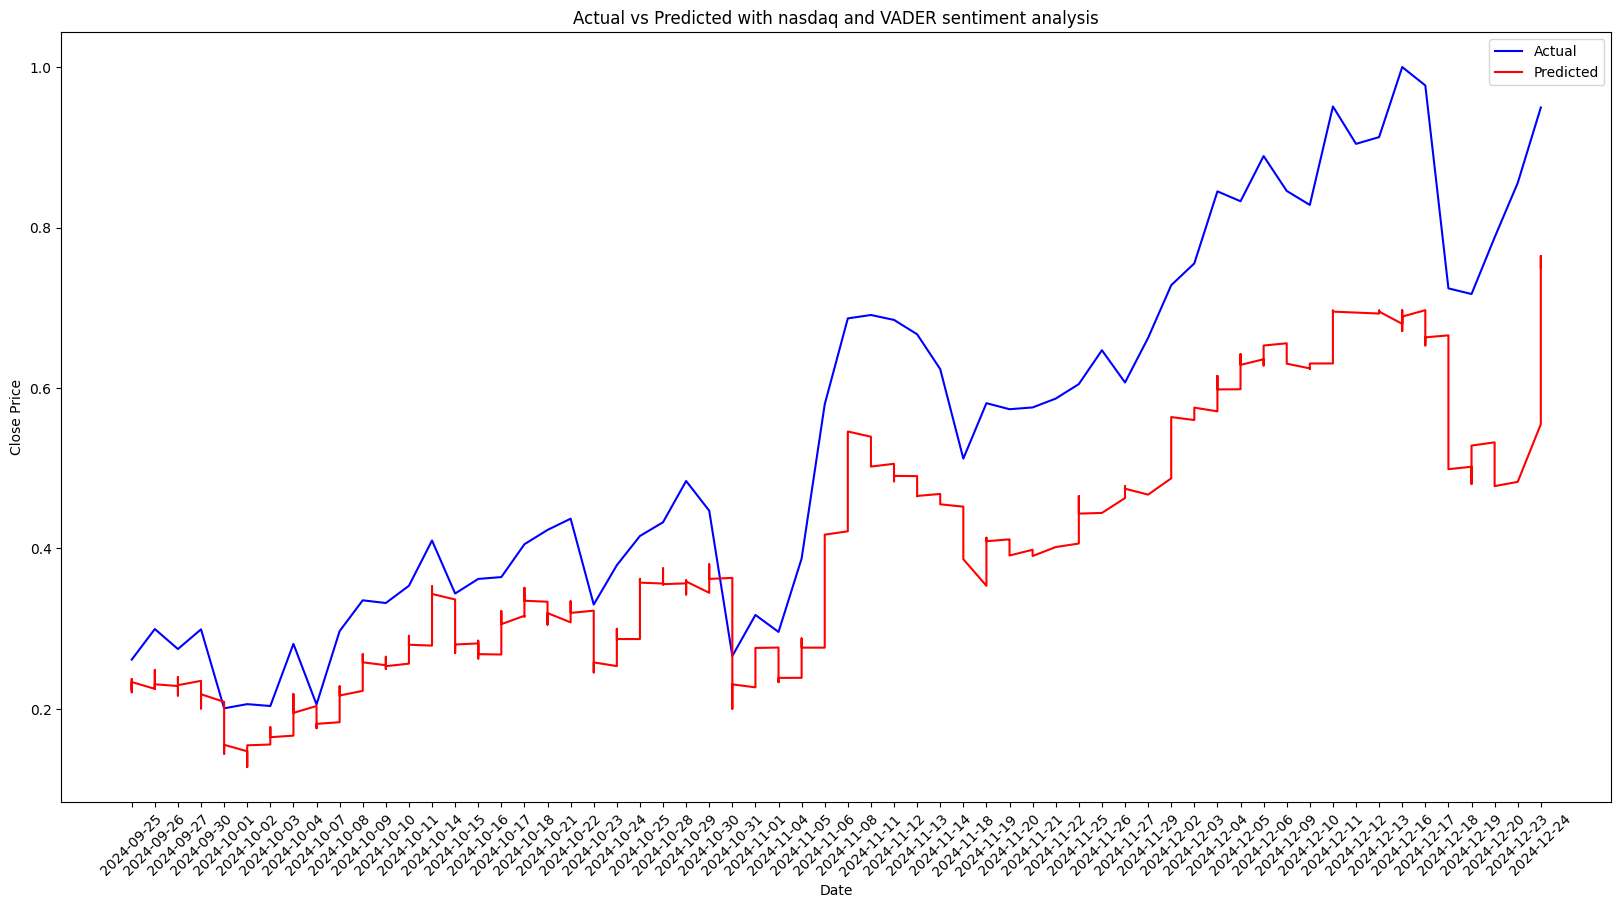

In [44]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER sentiment analysis')
plt.legend()
plt.show()

RoBERTa sentiment analysis 활용

In [46]:
roberta = ['Open', 'High', 'Low', 'Volume', 'roberta_sentiment']

In [47]:
X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [48]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - mae: 0.0409 - val_loss: 0.0106 - val_mae: 0.0846
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0029 - mae: 0.0418 - val_loss: 0.0145 - val_mae: 0.0966
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - mae: 0.0489 - val_loss: 0.0097 - val_mae: 0.0719
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - mae: 0.0400 - val_loss: 0.0082 - val_mae: 0.0701
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mae: 0.0408 - val_loss: 0.0108 - val_mae: 0.0846
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mae: 0.0338 - val_loss: 0.0185 - val_mae: 0.1000
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0730 - val_mae: 0.2005
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mae: 0.0378 - val_loss: 0.0136 - val_mae: 0.0912
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - 

In [50]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")
# test_mae > 0.1 이므로 모델 성능 안 좋음.. nasdaq 지수만 활용했을 때 0.044, vader sentiment analysis 활용했을 때 0.1 보다 성능 낮음!

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mae: 0.0992
Test Loss: 0.018, Test MAE: 0.122


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


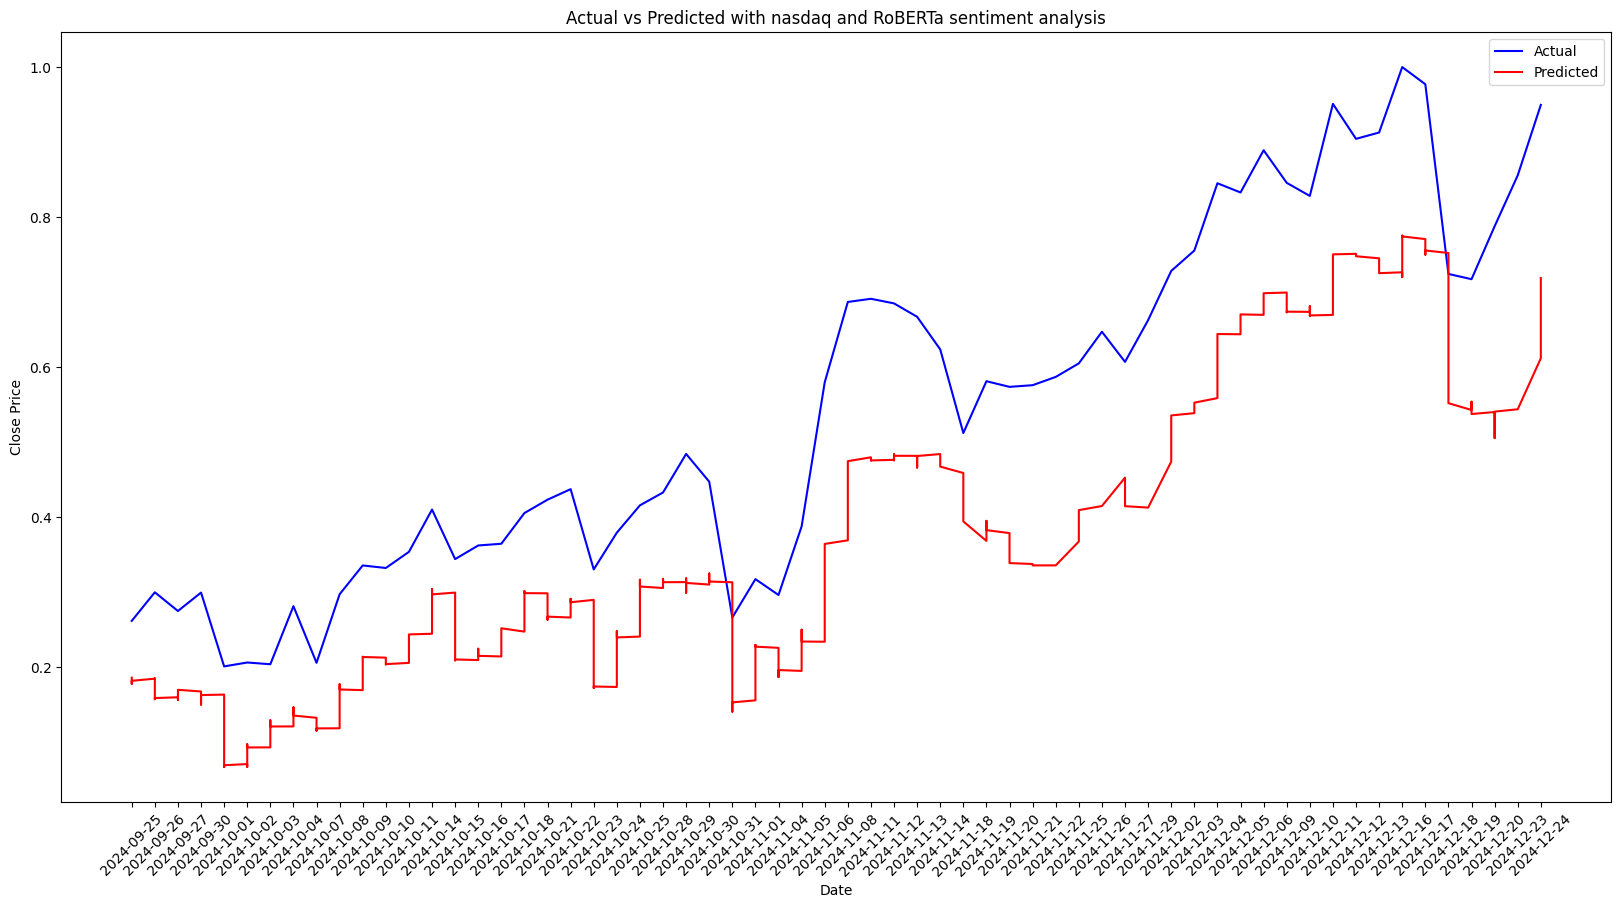

In [54]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and RoBERTa sentiment analysis')
plt.legend()
plt.show()

vader + roberta sentiment analysis 활용

In [51]:
total = ['Open', 'High', 'Low', 'Volume', 'total_sentiment']

X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [52]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mae: 0.0351 - val_loss: 0.0256 - val_mae: 0.1506
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - mae: 0.0310 - val_loss: 0.0204 - val_mae: 0.1335
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0016 - mae: 0.0307 - val_loss: 0.0200 - val_mae: 0.1311
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mae: 0.0306 - val_loss: 0.0228 - val_mae: 0.1425
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mae: 0.0301 - val_loss: 0.0202 - val_mae: 0.1218
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mae: 0.0304 - val_loss: 0.0220 - val_mae: 0.1327
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mae: 0.0317 - val_loss: 0.0229 - val_mae: 0.1393
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mae: 0.0304 - val_loss: 0.0156 - val_mae: 0.1187
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - l

In [53]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")
# test_mae > 0.1 이므로 모델 성능 안 좋음.. nasdaq 지수만 활용했을 때 0.044, vader sentiment analysis 활용했을 때 0.1 보다 성능 낮음!

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - mae: 0.1230
Test Loss: 0.021, Test MAE: 0.140


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


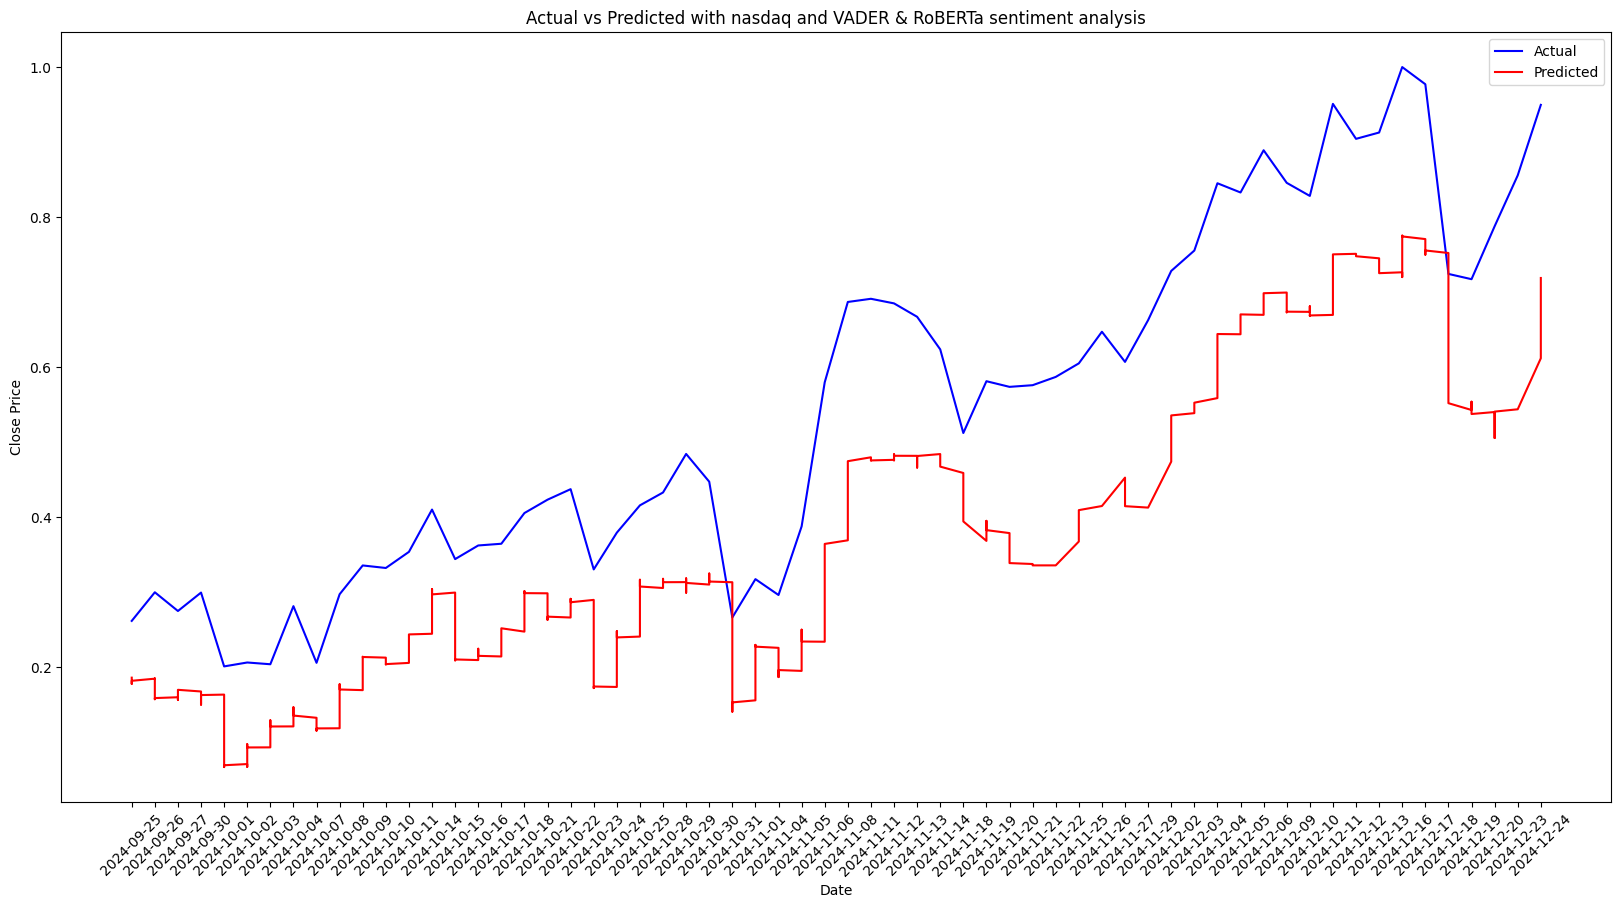

In [55]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER & RoBERTa sentiment analysis')
plt.legend()
plt.show()

# Bi-GRU

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout

nasdaq 지수만 활용

In [65]:
X, y, day_seq = create_sequences(df[nasdaq].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 4)
X_test shape: (1111, 30, 4)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [66]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0271 - mae: 0.1048 - val_loss: 0.0044 - val_mae: 0.0473
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0031 - mae: 0.0435 - val_loss: 0.0043 - val_mae: 0.0487
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0026 - mae: 0.0395 - val_loss: 0.0037 - val_mae: 0.0405
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0024 - mae: 0.0375 - val_loss: 0.0036 - val_mae: 0.0458
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mae: 0.0353 - val_loss: 0.0030 - val_mae: 0.0357
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020 - mae: 0.0344 - val_loss: 0.0016 - val_mae: 0.0314
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0024 - val_mae: 0.0335
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0037 - val_mae: 0.0439
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/

In [67]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mae: 0.0273
Test Loss: 0.003, Test MAE: 0.039


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


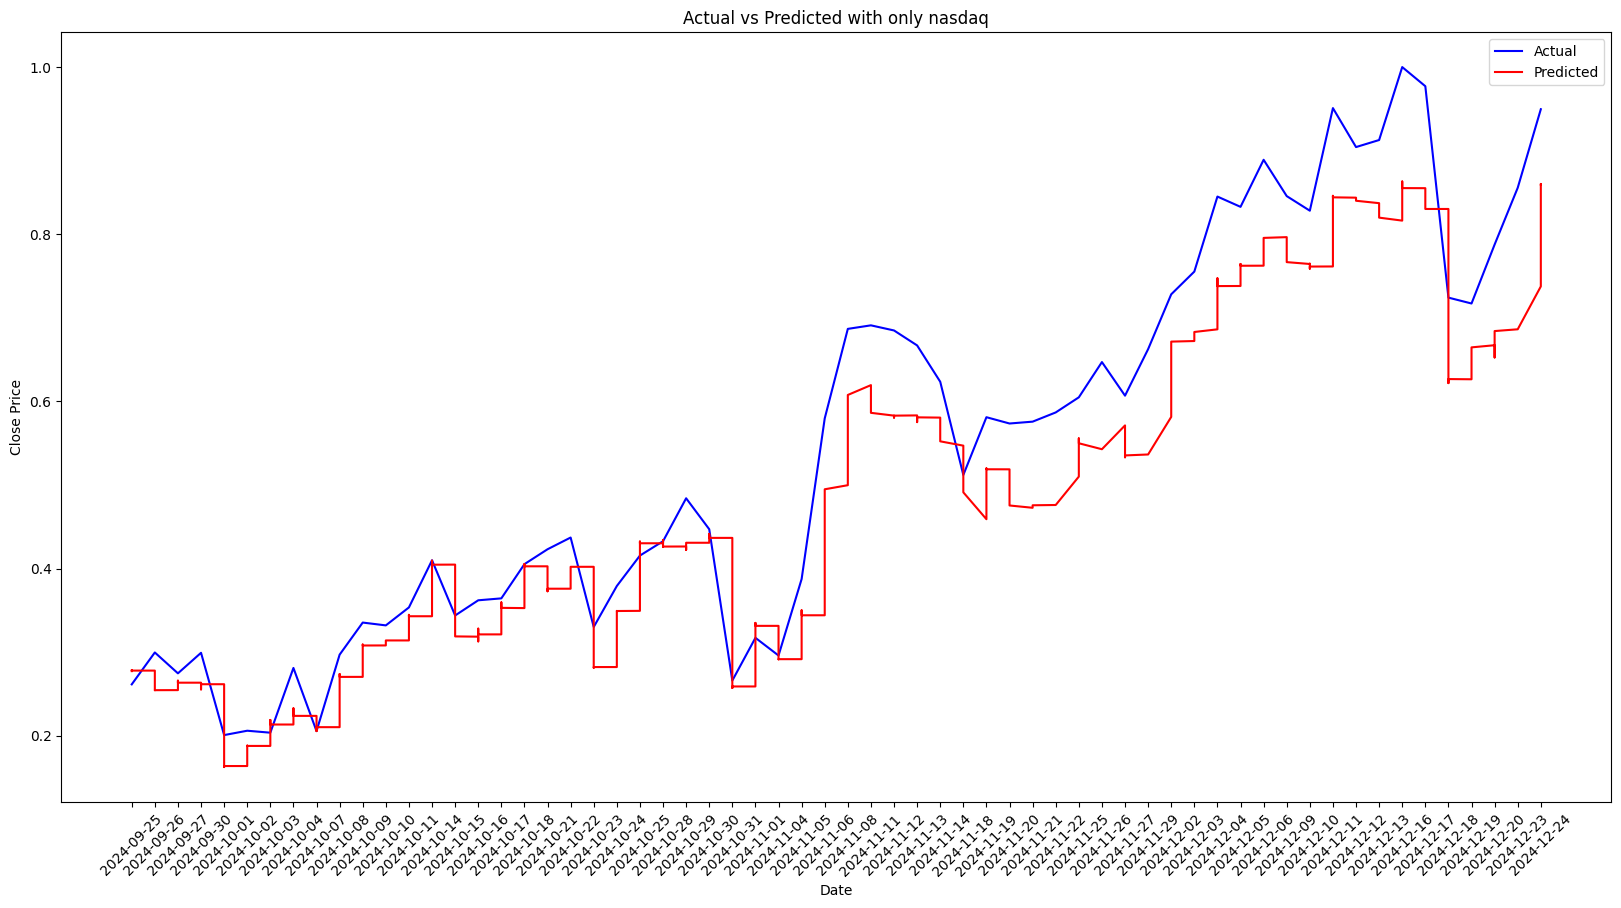

In [68]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with only nasdaq')
plt.legend()
plt.show()

VADER sentiment analysis 활용

In [59]:
X, y, day_seq = create_sequences(df[vader].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [60]:
# Bi-GRU 모델 정의
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(GRU(64)),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - loss: 0.0276 - mae: 0.1124 - val_loss: 0.0046 - val_mae: 0.0502
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0041 - mae: 0.0497 - val_loss: 0.0054 - val_mae: 0.0582
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0031 - mae: 0.0436 - val_loss: 0.0015 - val_mae: 0.0281
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028 - mae: 0.0403 - val_loss: 0.0074 - val_mae: 0.0697
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0028 - mae: 0.0405 - val_loss: 0.0016 - val_mae: 0.0283
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0025 - val_mae: 0.0400
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0023 - mae: 0.0366 - val_loss: 0.0021 - val_mae: 0.0327
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0024 - mae: 0.0370 - val_loss: 0.0016 - val_mae: 0.0287
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms

In [62]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5201e-04 - mae: 0.0198
Test Loss: 0.001, Test MAE: 0.025


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


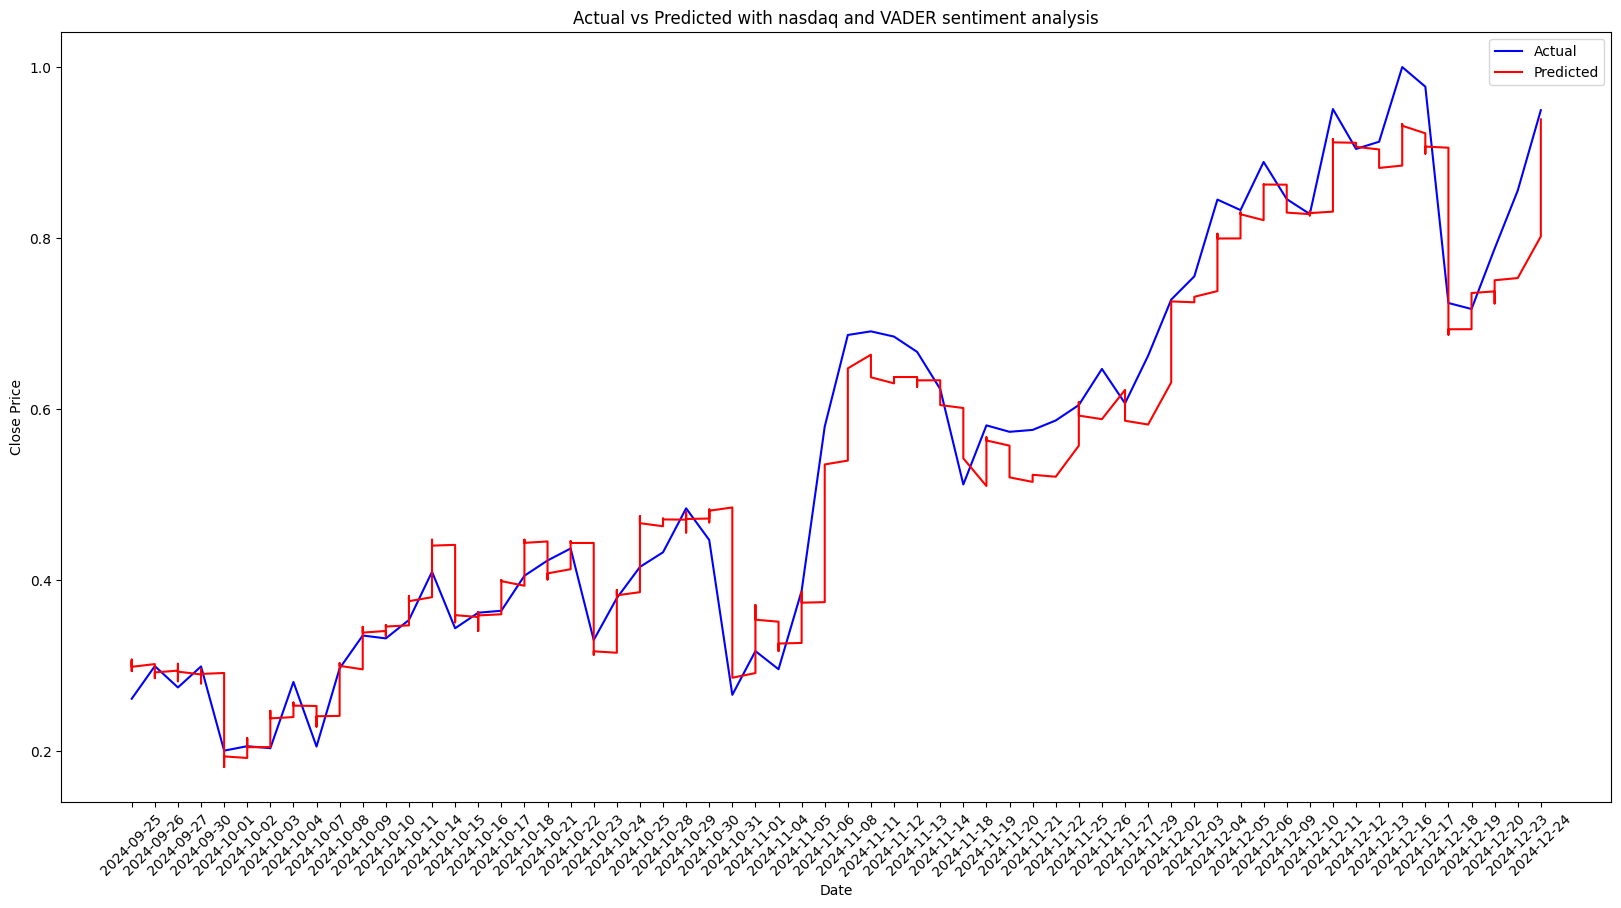

In [63]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER sentiment analysis')
plt.legend()
plt.show()

RoBERTa sentiment analysis 활용

In [69]:
X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [70]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0036 - mae: 0.0448 - val_loss: 0.0021 - val_mae: 0.0322
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - mae: 0.0329 - val_loss: 0.0039 - val_mae: 0.0474
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0019 - mae: 0.0330 - val_loss: 0.0023 - val_mae: 0.0343
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0017 - mae: 0.0317 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016 - mae: 0.0303 - val_loss: 0.0016 - val_mae: 0.0300
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017 - mae: 0.0311 - val_loss: 0.0013 - val_mae: 0.0269
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017 - mae: 0.0308 - val_loss: 0.0020 - val_mae: 0.0325
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.0021 - val_mae: 0.0340
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/

In [71]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0296    
Test Loss: 0.004, Test MAE: 0.045


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


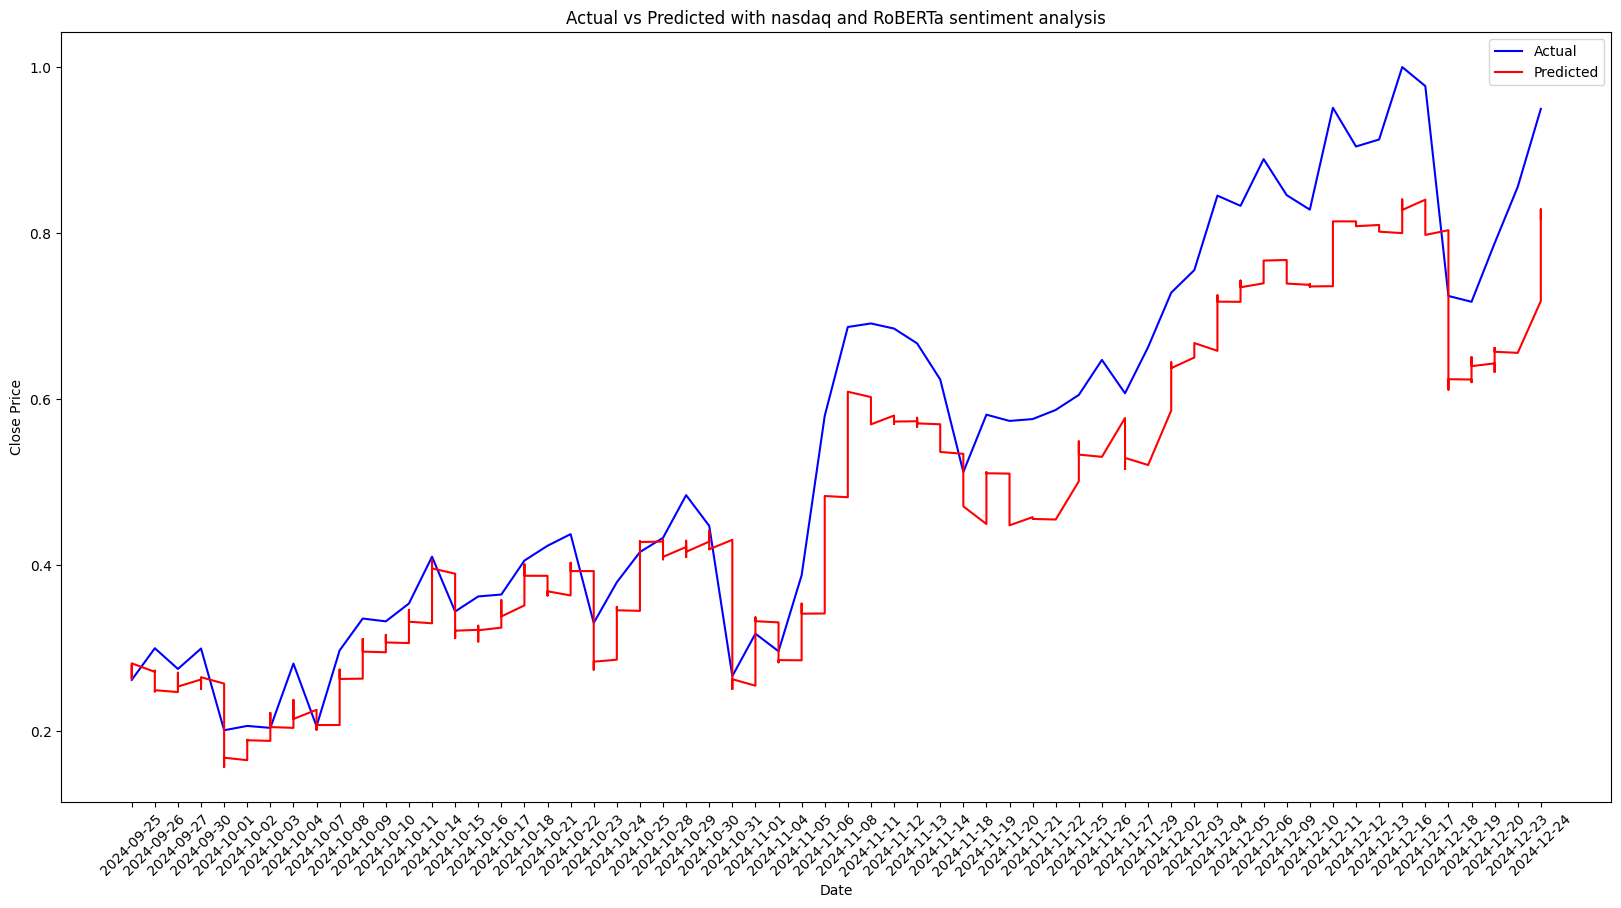

In [72]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and RoBERTa sentiment analysis')
plt.legend()
plt.show()

VADER + RoBERTa sentiment analysis 활용

In [73]:
X, y, day_seq = create_sequences(df[total].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
day_train, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("day_train shape:", day_train.shape)
print("day_test shape:", day_test.shape)

X_train shape: (4442, 30, 5)
X_test shape: (1111, 30, 5)
y_train shape: (4442,)
day_train shape: (4442,)
day_test shape: (1111,)


In [74]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0015 - mae: 0.0294 - val_loss: 0.0029 - val_mae: 0.0371
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0016 - mae: 0.0299 - val_loss: 0.0013 - val_mae: 0.0266
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mae: 0.0311 - val_loss: 0.0019 - val_mae: 0.0308
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016 - mae: 0.0297 - val_loss: 0.0013 - val_mae: 0.0274
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016 - mae: 0.0301 - val_loss: 0.0023 - val_mae: 0.0337
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0014 - mae: 0.0287 - val_loss: 0.0039 - val_mae: 0.0479
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0015 - mae: 0.0290 - val_loss: 0.0033 - val_mae: 0.0429
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0015 - mae: 0.0292 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/

In [75]:
# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mae: 0.0288    
Test Loss: 0.004, Test MAE: 0.043


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


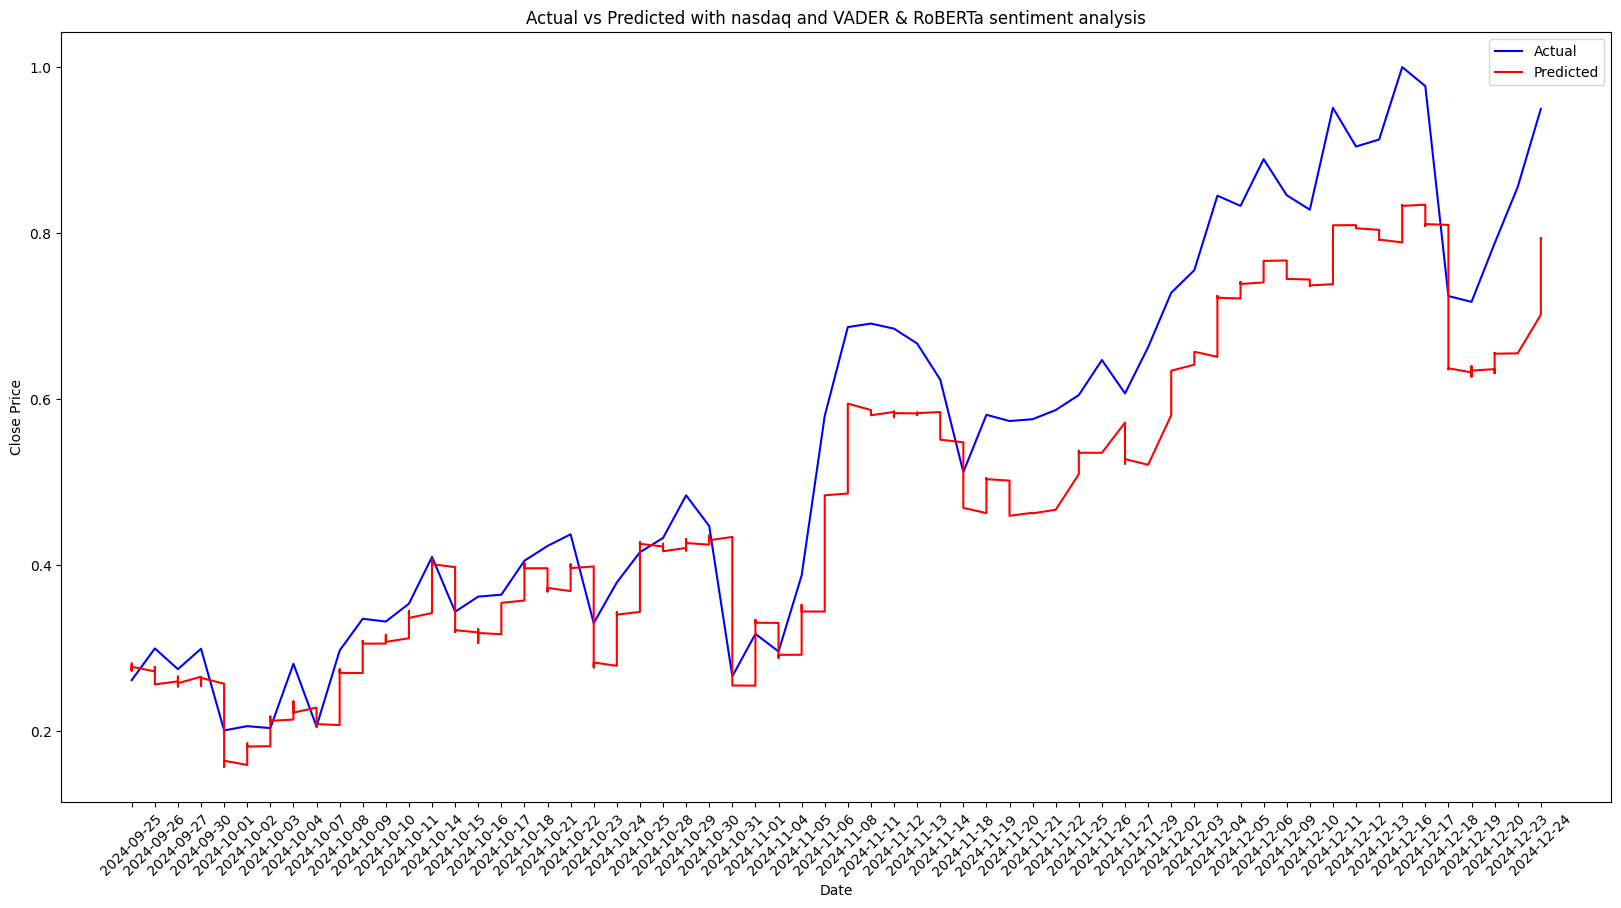

In [76]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER & RoBERTa sentiment analysis')
plt.legend()
plt.show()